In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz

In [0]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

spark = SparkSession.builder.master("local[*]").getOrCreate()

Подключим dataset

In [0]:
data = spark.read.csv('iris.csv', inferSchema=True, header=True)

Посмотрим содержимое dataset

In [181]:
data.show()

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

Название колонок в dataset, далее df

In [182]:
data.columns

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

Как можно заметить в df не совсем корректны название колоннок, их нужно исправить

In [0]:
new_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
df = data.toDF(*new_names)

Посмотрим новые колонки и данные по df

In [184]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  variety|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



Далее по условиям задачи необходимо получить min, max, mean(avg)

In [0]:
df_min_sepal_length = df.groupby('variety').min('sepal_length')
df_max_sepal_length = df.groupby('variety').max('sepal_length')
df_mean_sepal_length = df.groupby('variety').mean('sepal_length')

df_min_sepal_width = df.groupby('variety').min('sepal_width')
df_max_sepal_width = df.groupby('variety').max('sepal_width')
df_mean_sepal_width = df.groupby('variety').mean('sepal_width')

df_min_petal_length = df.groupby('variety').min('petal_length')
df_max_petal_length = df.groupby('variety').max('petal_length')
df_mean_petal_length = df.groupby('variety').mean('petal_length')

df_min_petal_width = df.groupby('variety').min('petal_width')
df_max_petal_width = df.groupby('variety').max('petal_width')
df_mean_petal_width = df.groupby('variety').mean('petal_width')

Добавим полученные значения в наш df

In [0]:
df_m1 = df.join(df_min_sepal_length, 'variety', how='inner')
df_m2 = df_m1.join(df_max_sepal_length, 'variety', how='inner')
df_m3 = df_m2.join(df_mean_sepal_length, 'variety', how='inner')

df_m4 = df_m3.join(df_min_sepal_width, 'variety', how='inner')
df_m5 = df_m4.join(df_max_sepal_width, 'variety', how='inner')
df_m6 = df_m5.join(df_mean_sepal_width, 'variety', how='inner')

df_m7 = df_m6.join(df_min_petal_length, 'variety', how='inner')
df_m8 = df_m7.join(df_max_petal_length, 'variety', how='inner')
df_m9 = df_m8.join(df_mean_petal_length, 'variety', how='inner')

df_m10 = df_m9.join(df_min_petal_width, 'variety', how='inner')
df_m11 = df_m10.join(df_max_petal_width, 'variety', how='inner')
df_m12 = df_m11.join(df_mean_petal_width, 'variety', how='inner')

Посмотрим что получилось

In [187]:
df_m12.show()

+-------+------------+-----------+------------+-----------+-----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+-----------------+------------------+----------------+----------------+------------------+
|variety|sepal_length|sepal_width|petal_length|petal_width|min(sepal_length)|max(sepal_length)|avg(sepal_length)|min(sepal_width)|max(sepal_width)| avg(sepal_width)|min(petal_length)|max(petal_length)| avg(petal_length)|min(petal_width)|max(petal_width)|  avg(petal_width)|
+-------+------------+-----------+------------+-----------+-----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+-----------------+------------------+----------------+----------------+------------------+
| Setosa|         5.1|        3.5|         1.4|        0.2|              4.3|              5.8|5.005999999999999|             2.3|             4.4|3.428000000000001|             

Для работы с визуализацией переконвертируем наш df в pandas (DataFrame)

In [0]:
df_iris = df_m12.toPandas()

In [189]:
df_iris.head()

,variety,sepal_length,sepal_width,petal_length,petal_width,min(sepal_length),max(sepal_length),avg(sepal_length),min(sepal_width),max(sepal_width),avg(sepal_width),min(petal_length),max(petal_length),avg(petal_length),min(petal_width),max(petal_width),avg(petal_width)
0,Setosa,5.1,3.5,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246
1,Setosa,4.9,3.0,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246
2,Setosa,4.7,3.2,1.3,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246
3,Setosa,4.6,3.1,1.5,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246
4,Setosa,5.0,3.6,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246


Построим визуализаций

In [190]:
df_iris.columns

Index(['variety', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'min(sepal_length)', 'max(sepal_length)', 'avg(sepal_length)',
       'min(sepal_width)', 'max(sepal_width)', 'avg(sepal_width)',
       'min(petal_length)', 'max(petal_length)', 'avg(petal_length)',
       'min(petal_width)', 'max(petal_width)', 'avg(petal_width)'],
      dtype='object')

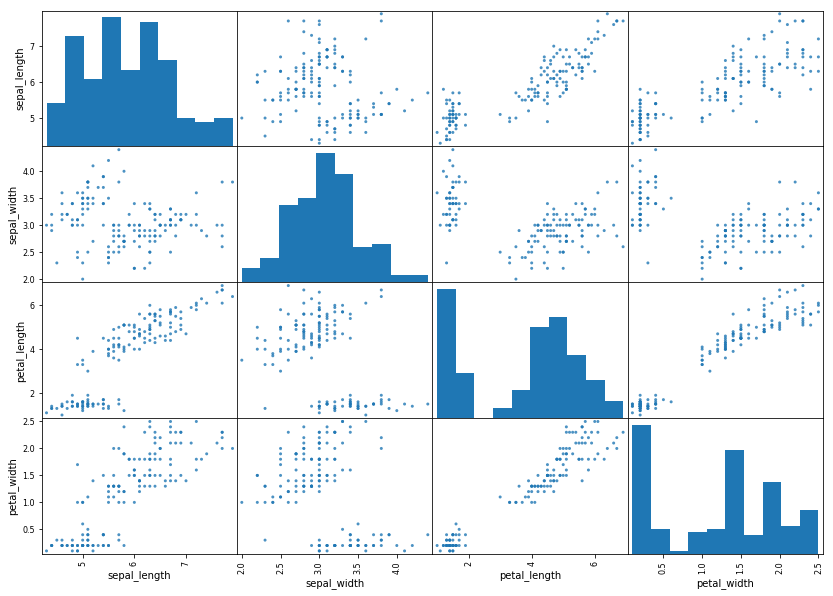

In [191]:
scatter_matrix(df_iris[['variety', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], alpha=0.8, figsize=(14,10))
plt.show()

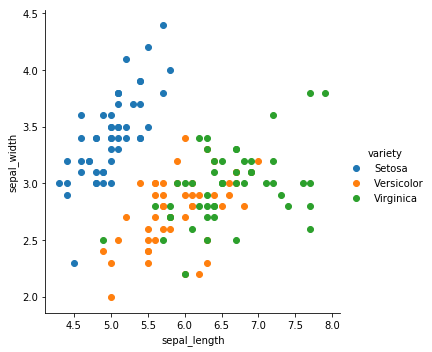

In [192]:
sns.FacetGrid(df_iris[['variety', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue="variety", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

plt.show()

In [0]:
# (df_iris.loc[df_iris['variety'] == 'Virginica']).head()

Сформируем правила для наших ячеек которые мы выводили в Spark 

(['variety', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'min(sepal_length)', 'max(sepal_length)', 'avg(sepal_length)',
       'min(sepal_width)', 'max(sepal_width)', 'avg(sepal_width)',
       'min(petal_length)', 'max(petal_length)', 'avg(petal_length)',
       'min(petal_width)', 'max(petal_width)', 'avg(petal_width)'])

- Setosa = (4.3,	5.8,	5.006,	2.3,	4.4,	3.428,	1.0, 1.9,	1.462,	0.1,	0.6,	0.246)
- Versicolor = (4.9,	7.0,	5.936,	2.0,	3.4	,2.77,	3.0,	5.1,	4.26,	1.0,1.8,	1.326)
- Virginica = (4.9,	7.9,	6.588,	2.2, 3.8,	2.974,	4.5,	6.9,	5.552,	1.4,	2.5,	2.026)


Давайте дадим цвета, в зависимости от параметров:

- x1=min(sepal_length), 
- x2=max(sepal_length), 
- x3=avg(sepal_length),
- x4=min(sepal_width), 
- x5=max(sepal_width), 
- x6=avg(sepal_width),
- x7=min(petal_length), 
- x8=max(petal_length), 
- x9=avg(petal_length),
- x10=min(petal_width), 
- x11=max(petal_width), 
- x12=avg(petal_width)

In [0]:
df_iris.columns = ['variety', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'x1', 'x2', 'x3',
       'x4', 'x5', 'x6',
       'x7', 'x8', 'x9',
       'x10', 'x11', 'x12']

In [195]:
df_iris.head()

,variety,sepal_length,sepal_width,petal_length,petal_width,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,Setosa,5.1,3.5,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246
1,Setosa,4.9,3.0,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246
2,Setosa,4.7,3.2,1.3,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246
3,Setosa,4.6,3.1,1.5,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246
4,Setosa,5.0,3.6,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246


In [0]:
df_iris['sum'] = df_iris[['x1', 'x2', 'x3',
                          'x4', 'x5', 'x6', 
                          'x7', 'x8', 'x9', 
                          'x10', 'x11', 'x12']].sum(axis=1)

In [197]:
df_iris.head()

,variety,sepal_length,sepal_width,petal_length,petal_width,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,sum
0,Setosa,5.1,3.5,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542
1,Setosa,4.9,3.0,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542
2,Setosa,4.7,3.2,1.3,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542
3,Setosa,4.6,3.1,1.5,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542
4,Setosa,5.0,3.6,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542


In [0]:
# (df_iris.loc[df_iris['variety'] == 'Virginica']).head()
# (df_iris.loc[df_iris['variety'] == 'Versicolor']).head()
# (df_iris.loc[df_iris['variety'] == 'Setosa']).head()

Итого:
- 30.542 по Setosa
- 42.492 по Versicolor
- 51.24 по Virginica

Как можно заметить, если выводить новую коллонку то она будет выглядеть  так:
- Setosa - X
- Versicolor - Y
- Virginica - Z

Немного изменю условие, возьму сумму по строкамиз самого df и вывиду значение в новый столбец

In [0]:
df_iris['sum_color'] = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].sum(axis=1)

In [199]:
df_iris.head()

,variety,sepal_length,sepal_width,petal_length,petal_width,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,sum,sum_color
0,Setosa,5.1,3.5,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542,10.2
1,Setosa,4.9,3.0,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542,9.5
2,Setosa,4.7,3.2,1.3,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542,9.4
3,Setosa,4.6,3.1,1.5,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542,9.4
4,Setosa,5.0,3.6,1.4,0.2,4.3,5.8,5.006,2.3,4.4,3.428,1.0,1.9,1.462,0.1,0.6,0.246,30.542,10.2


Теперь данные отличаются от ранее полученного результата, давайте зададим цвета, предварительно избавившись от ненужных столбцов. Путем формирования нового df

In [0]:
df_ir = df_iris[['variety', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sum_color']]

In [332]:
df_ir.describe()

,sepal_length,sepal_width,petal_length,petal_width,sum_color
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,13.858000
std,0.828066,0.435866,1.765298,0.762238,3.123762
min,4.300000,2.000000,1.000000,0.100000,8.400000
25%,5.100000,2.800000,1.600000,0.300000,10.700000
50%,5.800000,3.000000,4.350000,1.300000,14.300000
75%,6.400000,3.300000,5.100000,1.800000,16.250000
max,7.900000,4.400000,6.900000,2.500000,20.400000


Видим что sum_color имеет разброс, от:
- min = 8.4
- max = 20.4

Зададим правило:
- если значение sum_color от 1 - 10, тогда 'Green'
- если значение sum_color от 10.1 - 14, тогда 'Yellow'
- если значение sum_color от 14.1 - 16, тогда 'Blue'
- если значение sum_color от 16.1 - 21, тогда 'Red'

In [0]:
df_ir['color'] = df_ir.apply(lambda x: 'Green' if (x['sum_color']>=0.1) & (x['sum_color']<=10)
                             else ('Yellow' if (x['sum_color']>=10.01) & (x['sum_color']<=14) 
                                   else ('Blue' if (x['sum_color']>=14.01) & (x['sum_color']<=17)
                                        else ('Red' if (x['sum_color']>=17.01) & (x['sum_color']<=21.9)
                                            else '!!!' ))), axis=1)

In [334]:
df_ir.head()

,variety,sepal_length,sepal_width,petal_length,petal_width,sum_color,color
0,Setosa,5.1,3.5,1.4,0.2,10.2,Yellow
1,Setosa,4.9,3.0,1.4,0.2,9.5,Green
2,Setosa,4.7,3.2,1.3,0.2,9.4,Green
3,Setosa,4.6,3.1,1.5,0.2,9.4,Green
4,Setosa,5.0,3.6,1.4,0.2,10.2,Yellow


Хорошо, теперь посмотрим что обстоит с расспределением по цветам в df

In [337]:
# display((df_ir.loc[df_ir['color'] == 'Green']))
# display((df_ir.loc[df_ir['color'] == 'Yellow']))
# display((df_ir.loc[df_ir['color'] == 'Blue']))
# display((df_ir.loc[df_ir['color'] == 'Red']))

print("Колличество Blue: {}".format((df_ir['color']=='Blue').sum()))
print("Колличество Yellow: {}".format((df_ir['color']=='Yellow').sum()))
print("Колличество Red: {}".format((df_ir['color']=='Red').sum()))
print("Колличество Green: {}".format((df_ir['color']=='Green').sum()))

Колличество Blue: 53
Колличество Yellow: 49
Колличество Red: 26
Колличество Green: 22


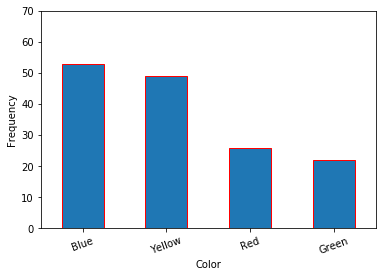

In [338]:
LABELS = ['Blue', 'Yellow', 'Red', 'Green']
count_classes = pd.value_counts(df_ir['color'], sort = True)
count_classes.plot(kind = 'bar', rot=20, edgecolor='Red')
plt.xticks(range(4), LABELS)
plt.xlabel("Color")
plt.ylabel("Frequency")
plt.ylim((0, 70))
plt.show()

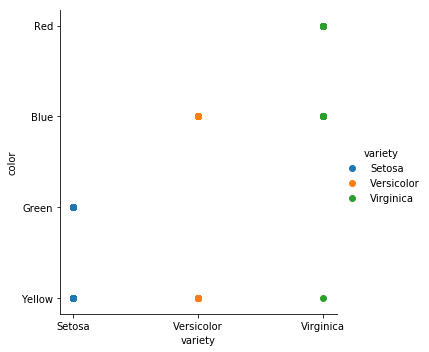

In [339]:
sns.FacetGrid(df_ir[['variety', 'color']], hue="variety", size=5) \
   .map(plt.scatter, "variety", "color") \
   .add_legend()

plt.show()

Далее сформируем df для обучения
- уберем variety т.к. цель задания предсказать цвет
- уберем sum_color т.к. данный столбец статистически не значим для нас

In [0]:
dataFrame_iris = df_ir[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'color']]

In [341]:
dataFrame_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,color
0,5.1,3.5,1.4,0.2,Yellow
1,4.9,3.0,1.4,0.2,Green
2,4.7,3.2,1.3,0.2,Green
3,4.6,3.1,1.5,0.2,Green
4,5.0,3.6,1.4,0.2,Yellow


Имея столбец в df с типом object, не лучший вариант для нас т.к. мы упираемся в проблему классификации, давайте зададим правило для данного столбца и дадим ему числовые обозначения

In [0]:
dataFrame_iris['color'] = dataFrame_iris.apply(lambda x: 0 if x['color']=='Blue' 
                                               else (1 if x['color']=='Yellow'
                                                    else (2 if x['color']=='Red'
                                                        else (3 if x['color']=='Green' else 5))), axis=1)

In [343]:
print("Колличество Blue: {}".format((dataFrame_iris['color']==0).sum()))
print("Колличество Yellow: {}".format((dataFrame_iris['color']==1).sum()))
print("Колличество Red: {}".format((dataFrame_iris['color']==2).sum()))
print("Колличество Green: {}".format((dataFrame_iris['color']==3).sum()))
print("Колличество: {}".format((dataFrame_iris['color']==5).sum()))

Колличество Blue: 53
Колличество Yellow: 49
Колличество Red: 26
Колличество Green: 22
Колличество: 0


In [344]:
dataFrame_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,color
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,1


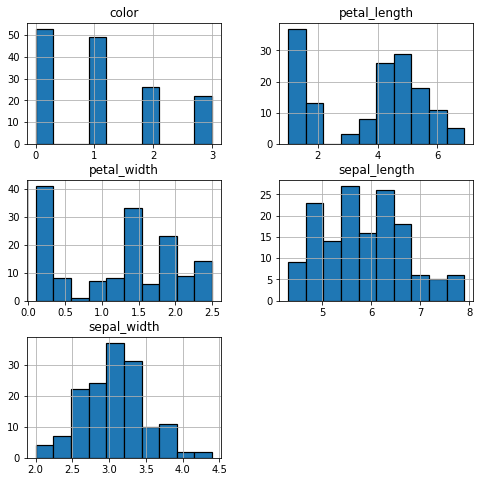

In [345]:
dataFrame_iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Похоже sepal_width имее "Нормально распределение"

Отлично теперь построим матрицу корреляции Пирсона

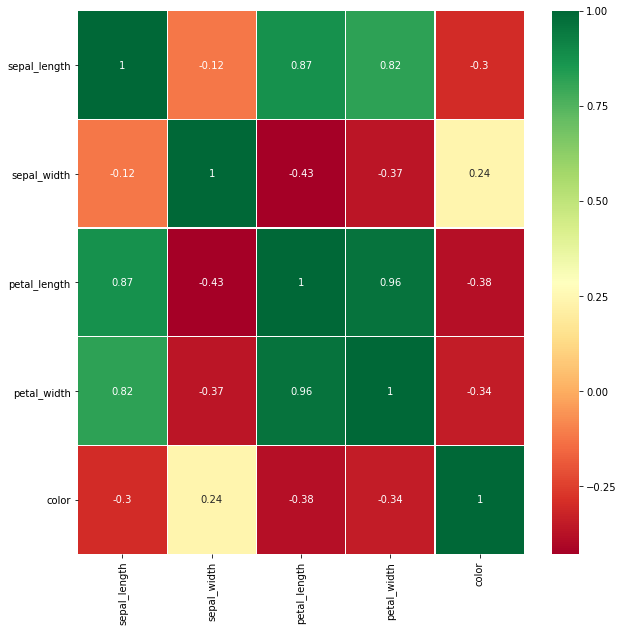

In [346]:
sns.heatmap(dataFrame_iris.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

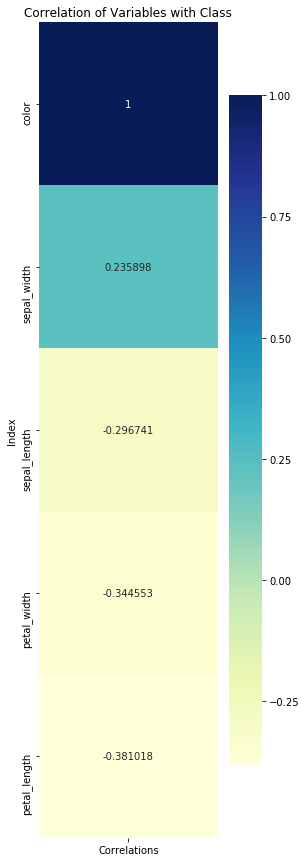

In [347]:
corr = dataFrame_iris.corrwith(dataFrame_iris['color']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

In [348]:
correlation_matrix = dataFrame_iris.corr(method ='pearson').round(2)
print(sorted(correlation_matrix['color']))

[-0.38, -0.34, -0.3, 0.24, 1.0]


sepal_width имеет положительную корреляцию с color, пусть и достаточно срабую. 

Попробуем построить модель линейной регрессии

In [360]:
print(dataFrame_iris.columns)
# print(np.isnan(dataFrame_iris.any())) #and gets False
# print(np.isfinite(dataFrame_iris.all())) #and gets True

# np.any(np.isnan(dataFrame_iris))
# np.all(np.isfinite(dataFrame_iris))

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'color'], dtype='object')


In [352]:
column_sels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = dataFrame_iris.loc[:,column_sels]
lstat = x['sepal_length']
indus = x['sepal_width']
nox = x['petal_length']
rm = x['petal_width']

y = dataFrame_iris['color']
x = np.vstack([np.array(lstat), np.array(indus), np.array(nox), np.array(rm)]).T
print('x - это многомерная матрица,: ')
print(x[:3])
model = LinearRegression().fit(x, y)

print('\nintercept:', model.intercept_)
print('slope:', model.coef_)

print('\nПредсказание модели: ', model.predict(x[0:2]))

x - это многомерная матрица,: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

intercept: 1.1108658363262307
slope: [ 0.19736949  0.05091041 -0.49678873  0.46730437]

Предсказание модели:  [1.69359334 1.62866424]


In [353]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(dataFrame_iris.ix[:, dataFrame_iris.columns != 'color'])
y = pd.DataFrame(dataFrame_iris.ix[:, dataFrame_iris.columns == 'color'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (120, 4)
Number transactions y_train dataset:  (120, 1)
Number transactions X_test dataset:  (30, 4)
Number transactions y_test dataset:  (30, 1)


In [355]:
column_sels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = X_train.loc[:,column_sels]
c1 = x['sepal_length']
c2 = x['sepal_width']
c3 = x['petal_length']
c4 = x['petal_width']

y = y_train['color']
x = np.vstack([np.array(c1), np.array(c2), 
               np.array(c3), np.array(c4)]).T

print('x - это многомерная матрица,: ')
print(x[:3])

model = LinearRegression().fit(x, y)

print('\nintercept:', model.intercept_)
print('slope:', model.coef_)

x - это многомерная матрица,: 
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]]

intercept: 0.8555343677382463
slope: [ 0.31989909 -0.0088592  -0.6010252   0.61595762]


In [363]:
print(y_train[0:5])
print('\nПредсказание модели: \n', model.predict(x[0:5]))

     color
137      0
84       0
27       1
127      0
132      0

Предсказание модели: 
 [0.67851015 0.7757349  1.70965618 0.94404147 0.86744844]


In [358]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.933, test: 0.926
R^2 train: 0.148, test: 0.117


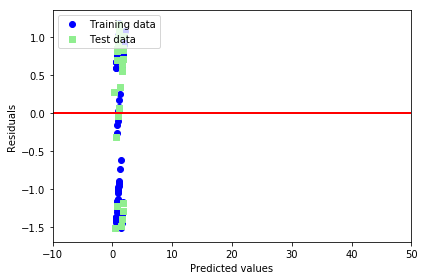

In [359]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

In [361]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'color']

results = smf.ols('color ~ sepal_length', data=dataFrame_iris).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  color   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.29
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           0.000227
Time:                        00:29:22   Log-Likelihood:                -213.11
No. Observations:                 150   AIC:                             430.2
Df Residuals:                     148   BIC:                             436.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.3174      0.589      5.634      0.000       2.154       4.481
sepal_length    -0.3772      0.100     -3.780      0.000      -0.574      -0.180
==============================================================================
Omnibus:                      177.386   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.596
Skew:                           0.527   Prob(JB):                     9.16e-05
Kurtosis:                       1.635   Cond. No.                         43.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
pass